In [106]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv("DESTO.csv")

In [108]:
languages = []
with open("All_Languages.txt","r+") as f:
    languages = f.read().split("\n")

In [109]:
def Keyword_EXTRACT(usefull_words):
    one_keyword_extract = []
    for i in range(len(usefull_words)):
        if usefull_words[i].lower() in languages:
            one_keyword_extract.append(usefull_words[i])
                
    
    two_extract_keyword = []
    
    for i in range(len(usefull_words)-1):
        if usefull_words[i]+" "+usefull_words[i+1] in languages:
            two_extract_keyword.append(usefull_words[i]+" "+usefull_words[i+1])
            if usefull_words[i] in one_keyword_extract:
                one_keyword_extract.remove(usefull_words[i])
            if usefull_words[i+1] in one_keyword_extract:
                one_keyword_extract.remove(usefull_words[i+1])

    three_extract_keyword = []

    for i in range(len(usefull_words)-2):
        if usefull_words[i]+" "+usefull_words[i+1]+" "+ usefull_words[i+2] in languages:
            three_extract_keyword.append(usefull_words[i]+" "+usefull_words[i+1]+" "+ usefull_words[i+2])
            if usefull_words[i] in one_keyword_extract:
                one_keyword_extract.remove(usefull_words[i])
            if usefull_words[i+1] in one_keyword_extract:
                one_keyword_extract.remove(usefull_words[i+1])
            if usefull_words[i+2] in one_keyword_extract:
                one_keyword_extract.remove(usefull_words[i+2])
    return one_keyword_extract,two_extract_keyword,three_extract_keyword

In [110]:
d = {}

keys = df['Topic'].values
values = df['Prerequisite'].values

for i in range(0,len(keys)):
    if str(values[i])!="nan":
        d[keys[i]] = Keyword_EXTRACT(values[i].split(" "))

In [111]:
graph = nx.DiGraph()

In [112]:
x = []
for key,values in d.items():
    value1,value2,value3 = values
    key = str(key)
    for i in set(value1):
        
        if str(i)!="nan" and key.lower()!=i.lower():
            graph.add_edge(key.lower(),i.lower())
    
    for i in set(value2):
        if str(i)!="nan" and key.lower()!=i.lower():
            graph.add_edge(key.lower(),i.lower())
    
    for i in set(value3):
        if str(i)!="nan" and key.lower()!=i.lower():
            graph.add_edge(key.lower(),i.lower())

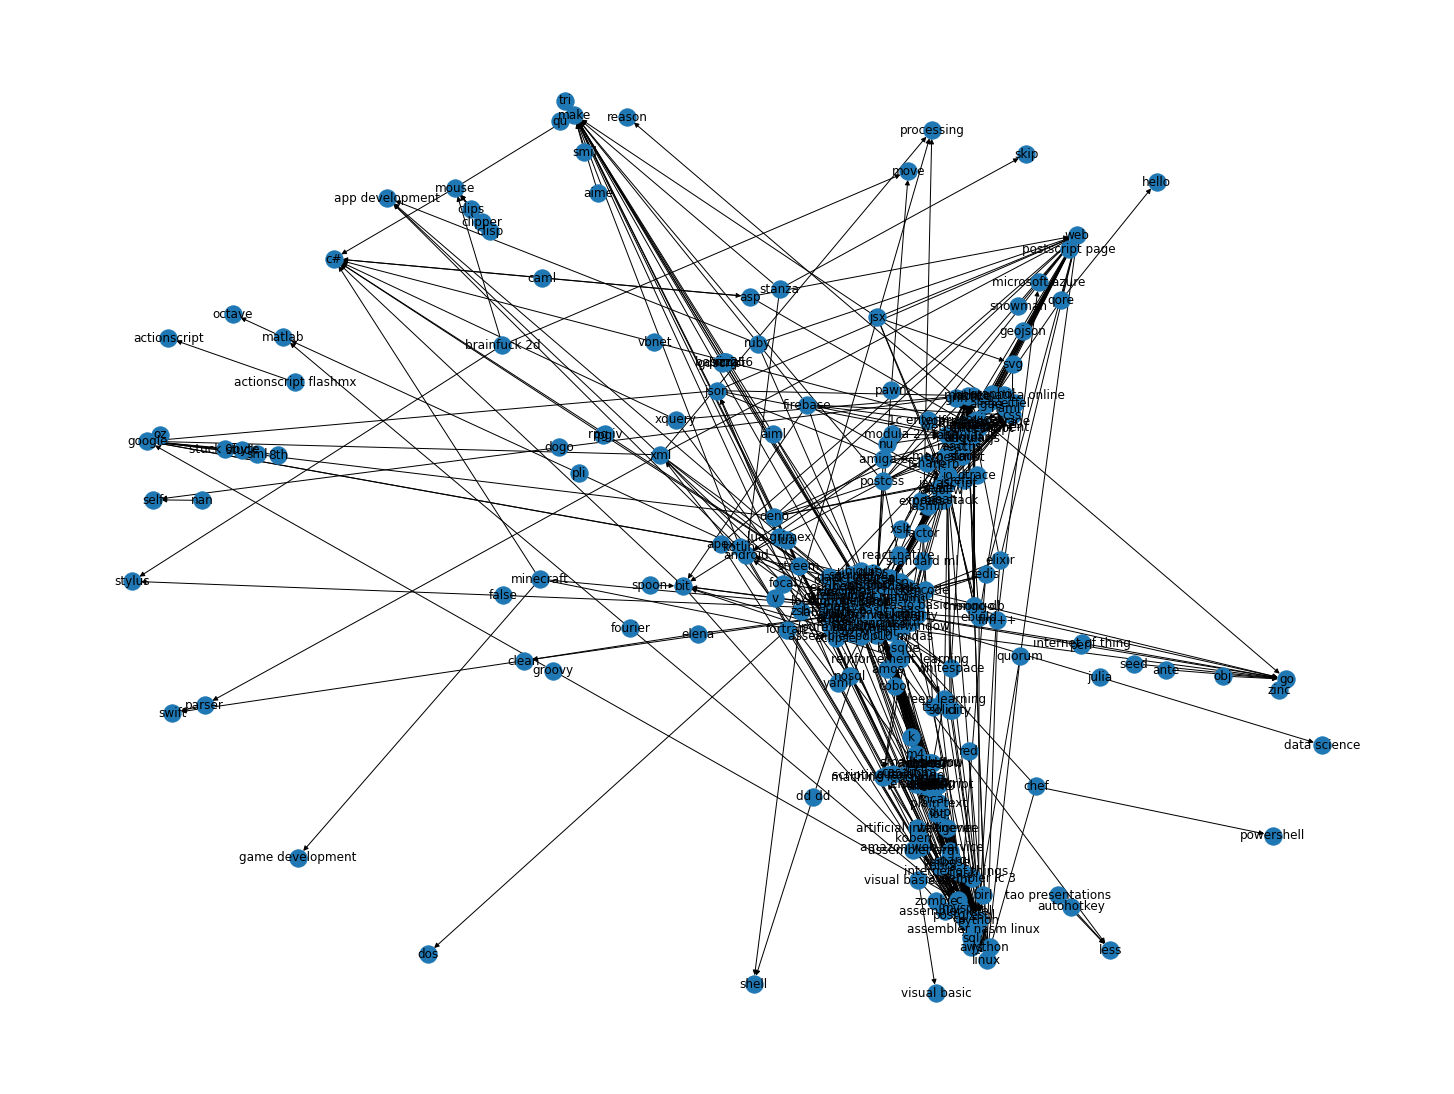

In [113]:
plt.figure(figsize=(20,15))
nx.draw(graph,with_labels=True)

In [128]:
print("prerequisite")
for i in graph.neighbors("c"):
    print(i+"-->")
print()

prerequisite
linux-->



In [115]:
wt = {}

keys = df['Topic'].values
out = df['Outcomes'].values
desc = df['Description'].values
opp = df['Opportunity'].values


values = []
for i in range(0,len(keys)):
    values.append(str(out[i]) +" "+str(desc[i])+" "+str(opp[i])+" ")

for i in range(0,len(keys)):
    if str(values[i])!="nan":
        wt[keys[i]] = Keyword_EXTRACT(values[i].split(" "))

In [116]:
wtGraph = nx.Graph()

In [117]:
def count(l,x):
    c = 0
    for i in l:
        if x==i:
            c+=1
    return c

In [118]:
x = []
for key,values in wt.items():
    value1,value2,value3 = values
    key = str(key)
    for i in set(value1):
        
        if str(i)!="nan" and key.lower()!=i.lower():
            wtGraph.add_edge(key.lower(),i.lower(),weight=count(value1,i))
    
    for i in set(value2):
        if str(i)!="nan" and key.lower()!=i.lower():
            wtGraph.add_edge(key.lower(),i.lower(),weight=count(value2,i))
    
    for i in set(value3):
        if str(i)!="nan" and key.lower()!=i.lower():
            wtGraph.add_edge(key.lower(),i.lower(),weight=count(value3,i))

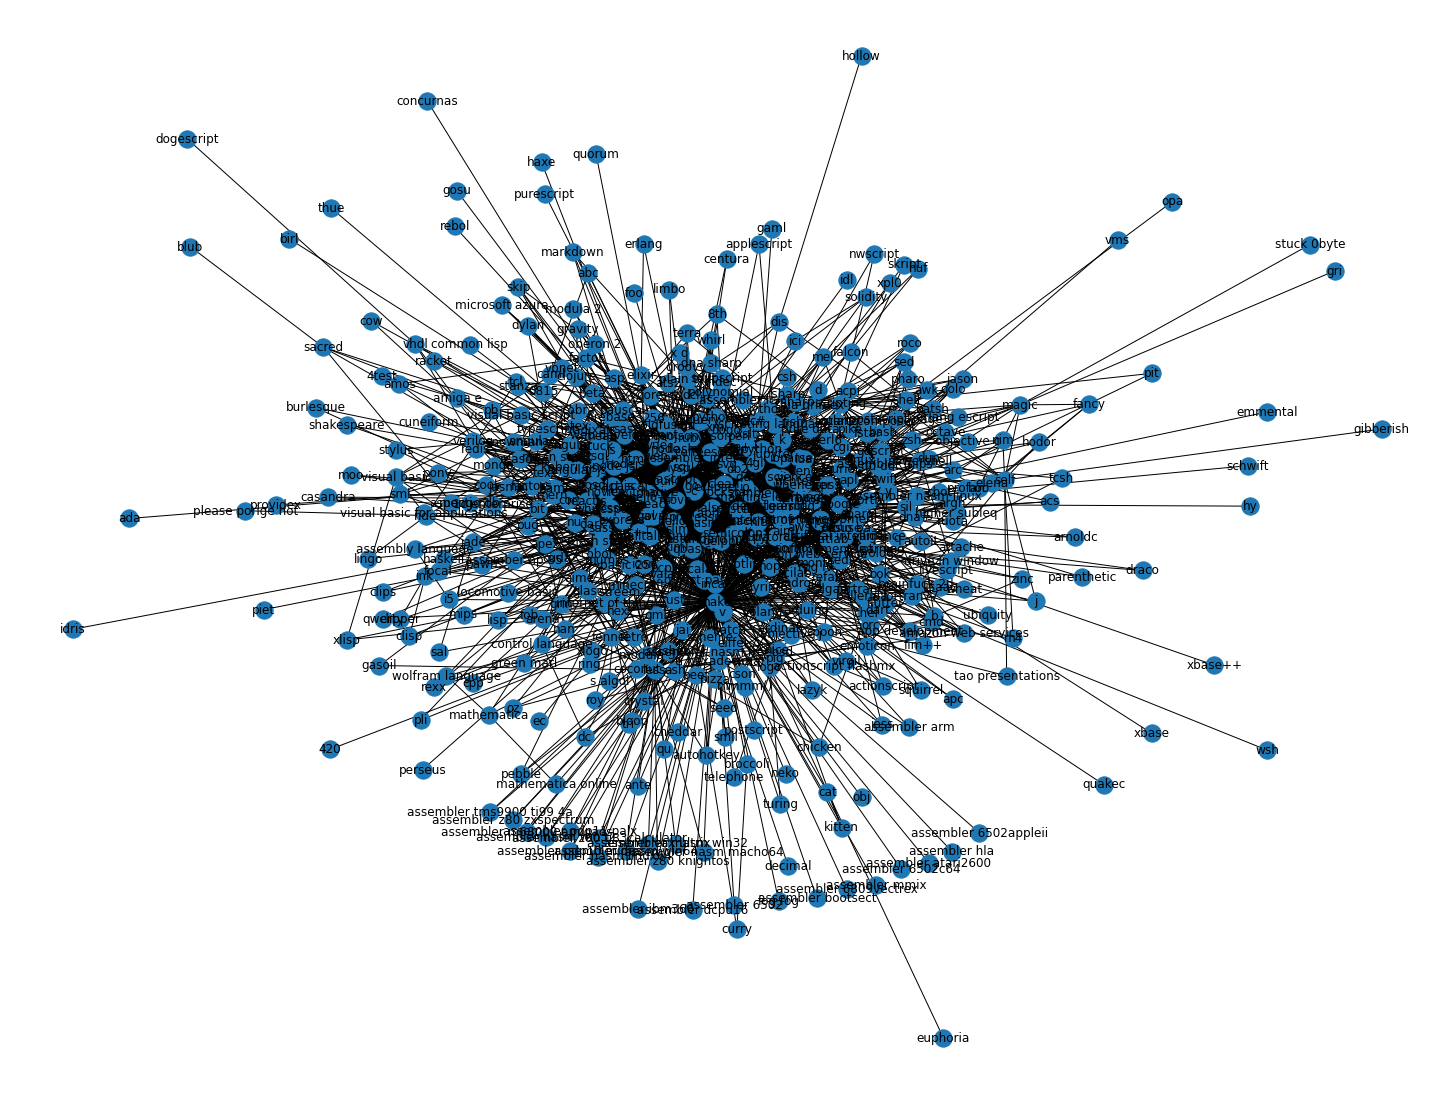

In [119]:
plt.figure(figsize=(20,15))
nx.draw(wtGraph,with_labels=True)

In [120]:
name = "node"
for i in wtGraph.neighbors(name):
    print(i,wtGraph.edges[(name,i)]['weight'])
print()

deno 1
express 2
graphql 2
ici 1
io 1
mean 4
mongo 1
mongo db 1
web 8
sql 2
c++ 1
stuck 1
nodejs 11
css 1
javascript 2
nosql 1
react 2
react native 1
mean stack 1
web development 1
node js 9
objective c 1
objective j 1
pug 1
solidity 1
xquery 1
xslt 1

